# Titanic Dataset : Basic Kernel
We will first import the required libraries.

In [23]:
import pandas as pd
import seaborn as sns
import collections
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Import the training data.

In [2]:
dat_train_orig = pd.read_csv("./titanic/train.csv")
dat_test = pd.read_csv('./titanic/test.csv')
dat_verify = pd.read_csv('./titanic/gender_submission.csv')

dat_train = pd.concat([dat_train_orig, dat_test])
dat_train.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


Let us fetch some information about the dataframe.

In [3]:
print(dat_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 107.4+ KB
None


We see here that the total entries in the dataset are 1309, but the *Age*, *Cabin*, and *Embarked* columns have missing entries. We will fix those later.

We now plot the amount of people who survived.

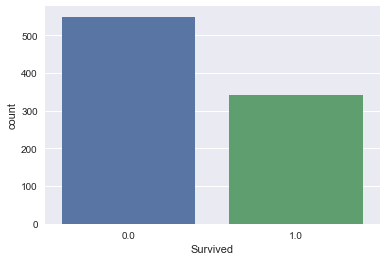

In [4]:
sns.set()
sns.countplot(x='Survived', data=dat_train)

We will now try to find which of the columns are related to the survival index of a person by visualising them.
Let us first see the effect of the *Pclass* attribute.

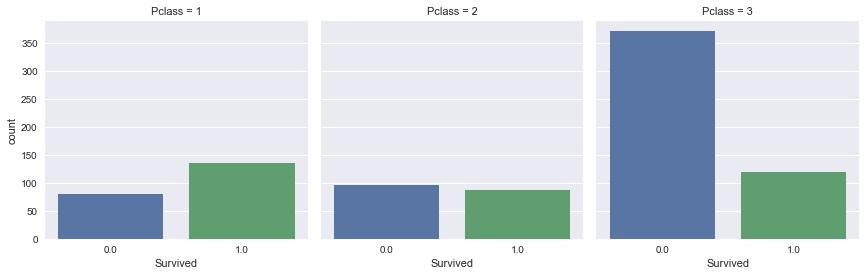

In [5]:
sns.factorplot(x='Survived', col='Pclass', kind= 'count', data=dat_train)

Clearly, the passenger class played a significant role in the deaths, with the lowermost amounting to the most casualties.

We now check the impact of the *Sex* attribute.

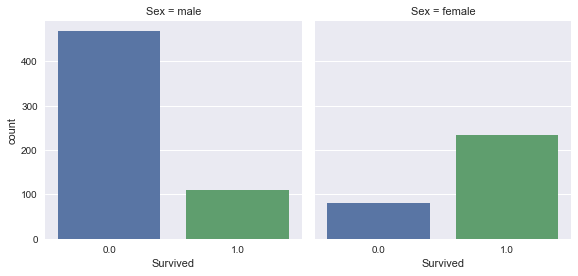

In [6]:
sns.factorplot(x='Survived', col='Sex', kind='count', data=dat_train)

Clearly, the females had a much better chance of survival than males. Ouch.

Although the *Age* attribute has missing values, we check to see if it holds any significance in the survivability index.

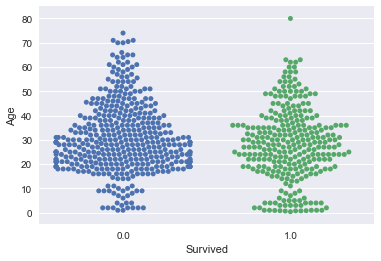

In [7]:
sns.swarmplot(x='Survived', y='Age', data=dat_train)

We also look at the overall age distribution.

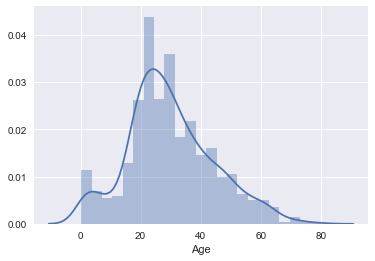

In [8]:
available_Age = dat_train.Age.dropna(axis=0)
sns.distplot(available_Age)

We see that the majority of population was in the 20-40 years age division, and that's where the chances of survivability were highest, as well as, lowest. Hence, the inclusion of Age as a deciding factor for survivability is debatable.

To include the next two features *SibSp* and *Parch*, we make a new feature set *FamilySize* which is the sum of these two features.

In [9]:
dat_train['FamilySize'] = dat_train.SibSp + dat_train.Parch + 1

We now see survivability as a measure of family size.

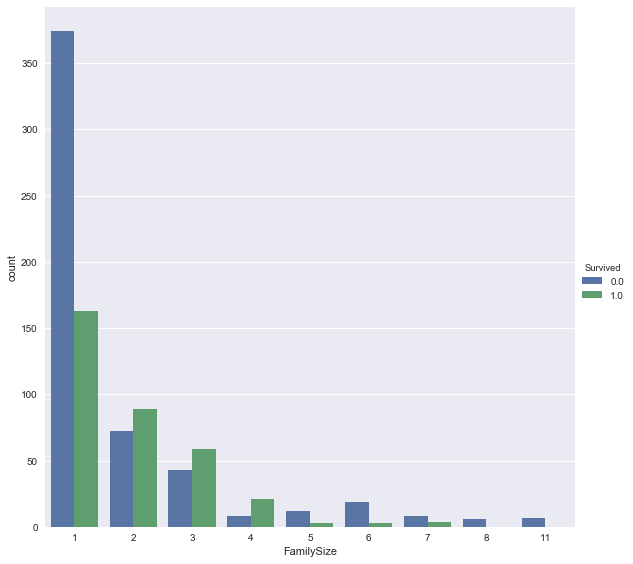

In [10]:
sns.factorplot(x="FamilySize", hue='Survived', data=dat_train, kind='count', size=8)

We see clearly that a a medium-sized family has more chances of survival than, say, a large one, or people travelling alone.

While the ticket number seems like an unrelated statistic, we can see the count of people travelling by the same ticket, since they could be friends.

In [11]:
ticket_list = dat_train.Ticket.tolist()
count_ticket = collections.Counter(ticket_list)
list_ticket = np.array(list(count_ticket.values()))
print("The total groups travelling on single tickets are: %d.\n They are of sizes: %s" % (list_ticket[list_ticket > 1].size,list_ticket[list_ticket > 1]))

The total groups travelling on single tickets are: 216.
 They are of sizes: [ 2  2  2  5  3  2  3  7  6  2  2  7  6  3  2  2  2  2  2  4  2  3  2  7
  3  2  2  4  8  2  2  6  3  7  2  8  3  2  2  2  5  2  4  2  2  2  2  3
  2  2  2  3  3  2  2  2  2  3  2  4  3  2  3  2 11  2  2  3  2  5  4  4
  3  2  2  2  2  2  3  2  2  2  2  3  2  3  2  2  2  2  3  3  2  3  4  2
  3  3  4  2  2  3  3  3  3  2  6  3  4  3  2  2  3  7  2  3  4  5  2  2
  2  3  2  2  2  2  2  5  5  3  4  2  2  3  3  3  3  2  2  2  2  2  3  4
  2  2  2  2  2  2  3  3  2  2  4  4  3  2  2  2  2  2  3  2  2  2  2  2
  2  3  2  2  5  2  2  2  2  3  2  4  2  2  2  2  2  2  2  2  3  2  2  2
  4  2  2  3  3  2  2  2  2  2  3  2  2  2  2  2  2  2  2  3  2  2  2  2]


We see that the total groups travelling on common tickets are quite sizeable. Now, they could be friends, acquaintances, or anything like that. And hence, we'd definitely like to see their chance of survival.

We create a feature *GroupSize*, which indicates the size of the same-ticket group the person belongs to.

In [12]:
group_list = []
for key in dat_train.Ticket:
    group_list.append(count_ticket[key])
dat_train = dat_train.assign(GroupSize = group_list)

We again plot the survivability of the people with respect to the group strength they belong to.

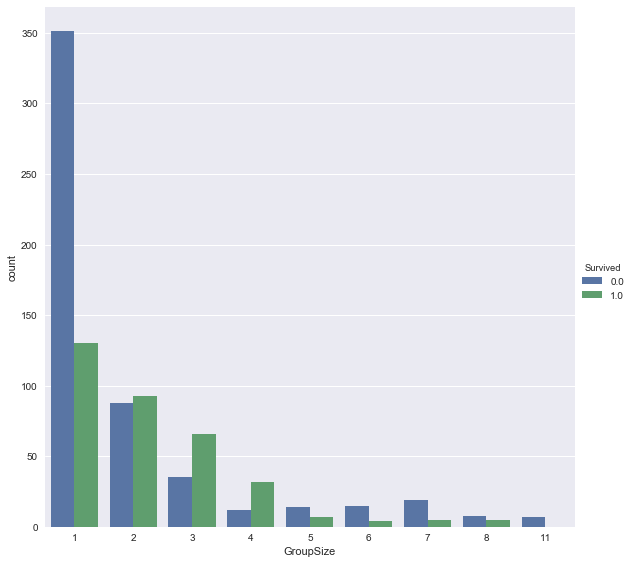

In [13]:
sns.factorplot(x='GroupSize', hue='Survived', data=dat_train, kind='count', size=8)

We again observe that an increased group size leads to better chances of survivability, with solitary travellers having higher chances of deaths.

We neglect cabin details altogether, due to lack of sufficient resources available for analysis as well as the missing entries. We also do not factor the *Embarked* feature, since it does not matter where a person embarked, to his survivability.

With all this, we can create a nice list of features which we can include to fit in the algorithm.

In [14]:
feature_list = ['Pclass','male','female','FamilySize','GroupSize']


We fill the missing entries in the age column with the mean of the total ages.

In [15]:
dat_train.Age = dat_train.Age.fillna(value=dat_train.Age.mean())

Also, we input dummy values for the *Sex* feature for predictions in the classifier.

In [16]:
dat_train = pd.concat([dat_train, pd.get_dummies(dat_train.Sex)], axis=1)
dat_train

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,FamilySize,GroupSize,female,male
0,22.000000,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2,1,0,1
1,38.000000,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2,2,1,0
2,26.000000,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,1,1,0
3,35.000000,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2,2,1,0
4,35.000000,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1,1,0,1
5,29.881138,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,1,1,0,1
6,54.000000,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,1,2,0,1
7,2.000000,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,5,5,0,1
8,27.000000,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,3,3,1,0
9,14.000000,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,2,2,1,0


We split the data back.

In [17]:
dat_test = dat_train.iloc[891:, :]
dat_train = dat_train.iloc[:891, :]
dat_test

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,FamilySize,GroupSize,female,male
0,34.500000,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911,1,1,0,1
1,47.000000,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272,2,1,1,0
2,62.000000,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276,1,1,0,1
3,27.000000,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,315154,1,1,0,1
4,22.000000,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,NaN,3101298,3,2,1,0
5,14.000000,NaN,S,9.2250,"Svensson, Mr. Johan Cervin",0,897,3,male,0,NaN,7538,1,1,0,1
6,30.000000,NaN,Q,7.6292,"Connolly, Miss. Kate",0,898,3,female,0,NaN,330972,1,1,1,0
7,26.000000,NaN,S,29.0000,"Caldwell, Mr. Albert Francis",1,899,2,male,1,NaN,248738,3,3,0,1
8,18.000000,NaN,C,7.2292,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,900,3,female,0,NaN,2657,1,1,1,0
9,21.000000,NaN,S,24.1500,"Davies, Mr. John Samuel",0,901,3,male,2,NaN,A/4 48871,3,3,0,1


We choose the RandomForestClassifier first for making the prediction.

In [51]:
classifier = RandomForestClassifier(n_estimators=5)

In [52]:
classifier.fit(dat_train[feature_list],dat_train.Survived)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [53]:
result = classifier.predict(dat_test[feature_list])

In [54]:
output = pd.Series(data=result.astype(int))

In [55]:
output = pd.concat([pd.Series(data=np.arange(892,1310)), output], axis = 1)

In [56]:
output.columns = ['PassengerId', 'Survived']

In [57]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,1
8,900,1
9,901,0


In [1]:
output.to_csv("./titanic/submission2.csv", index=False)

NameError: name 'output' is not defined